In [2]:
import numpy as np
import pandas as pd 
import tushare as ts
import seaborn as sns
import matplotlib.pyplot as lplt
%matplotlib inline

## 获取收据

In [3]:
hs300 = ts.get_k_data('hs300', '2000-01-01', '2019-05-31')

In [4]:
hs300.set_index('date', inplace=True)
hs300.index = pd.to_datetime(hs300.index)
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300


In [5]:
hs300.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3440 entries, 2005-04-08 to 2019-05-31
Data columns (total 6 columns):
open      3440 non-null float64
close     3440 non-null float64
high      3440 non-null float64
low       3440 non-null float64
volume    3440 non-null float64
code      3440 non-null object
dtypes: float64(5), object(1)
memory usage: 188.1+ KB


In [6]:
hs300_close = hs300['close']

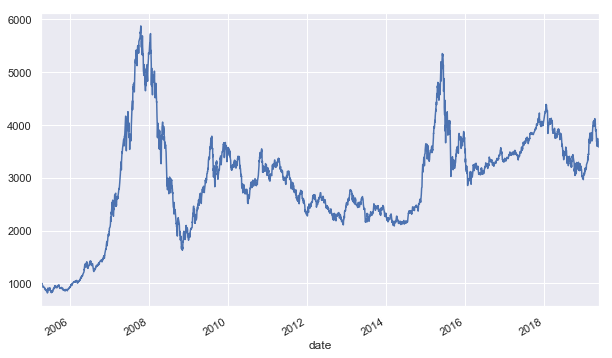

In [7]:
sns.set()
hs300_close.plot(figsize=(10,6))

## 特征工程处理

In [9]:
for i in range(1,21):
    hs300['close-'+str(i)+'d'] = hs300['close'].shift(i)

In [10]:
hs300.head(21)

,open,close,high,low,volume,code,close-1d,close-2d,close-3d,close-4d,...,close-11d,close-12d,close-13d,close-14d,close-15d,close-16d,close-17d,close-18d,close-19d,close-20d
date,,,,,,,,,,,,,,,,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300,1003.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300,995.42,1003.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300,978.70,995.42,1003.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300,1000.90,978.70,995.42,1003.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,982.61,974.08,982.61,971.93,10409000.0,hs300,986.97,1000.90,978.70,995.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-18,970.91,963.77,970.91,958.65,8598400.0,hs300,974.08,986.97,1000.90,978.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-19,962.92,965.89,968.87,957.91,9212620.0,hs300,963.77,974.08,986.97,1000.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-20,964.15,950.87,964.15,946.20,8850700.0,hs300,965.89,963.77,974.08,986.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
hs_20d = hs300[[x for x in hs300.columns if 'close'  in x]].iloc[20:]

In [14]:
hs_20d.head()

,close,close-1d,close-2d,close-3d,close-4d,close-5d,close-6d,close-7d,close-8d,close-9d,...,close-11d,close-12d,close-13d,close-14d,close-15d,close-16d,close-17d,close-18d,close-19d,close-20d
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,930.07,...,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42,1003.45
2005-05-16,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,937.08,...,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70,995.42
2005-05-17,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,926.60,...,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90,978.70
2005-05-18,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,942.07,...,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97,1000.90
2005-05-19,884.17,883.20,881.46,875.27,887.54,885.82,901.85,913.08,909.17,932.40,...,926.60,937.08,930.07,939.10,943.98,950.87,965.89,963.77,974.08,986.97


In [16]:
hs_20d = hs_20d.iloc[:, ::-1]  #转换特征的顺序

In [17]:
hs_20d.head()

,close-20d,close-19d,close-18d,close-17d,close-16d,close-15d,close-14d,close-13d,close-12d,close-11d,...,close-9d,close-8d,close-7d,close-6d,close-5d,close-4d,close-3d,close-2d,close-1d,close
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,1003.45,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,...,930.07,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54
2005-05-16,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,...,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27
2005-05-17,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,...,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46
2005-05-18,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,...,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20
2005-05-19,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,926.60,...,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20,884.17


## 测试集表现

In [18]:
from sklearn.svm import SVR

In [19]:
clf = SVR(kernel='linear')

### 生成训练集和测试集

In [20]:
feature_train = hs_20d[:2300]
feature_train.head()

,close-20d,close-19d,close-18d,close-17d,close-16d,close-15d,close-14d,close-13d,close-12d,close-11d,...,close-9d,close-8d,close-7d,close-6d,close-5d,close-4d,close-3d,close-2d,close-1d,close
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,1003.45,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,...,930.07,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54
2005-05-16,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,...,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27
2005-05-17,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,...,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46
2005-05-18,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,...,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20
2005-05-19,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,926.60,...,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20,884.17


In [21]:
label_train = hs_20d['close'].shift(-1)[:2300]      #回归问题的标签就是预测的股价，下一天的收盘价就是前一天的标签

In [22]:
feature_test = hs_20d[2300:]

In [23]:
label_test = hs_20d['close'].shift(-1)[2300:]

### 训练模型

In [24]:
clf.fit(feature_train, label_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
predict = clf.predict(feature_test)

In [26]:
predict[:50]

array([2441.2002451 , 2448.54642005, 2499.01285846, 2502.84145383,
       2534.22707406, 2514.81506936, 2507.48308076, 2528.60765542,
       2540.65695183, 2554.67494389, 2587.41239598, 2589.97284046,
       2589.31806771, 2604.64706826, 2559.80710193, 2549.91747896,
       2553.44558124, 2576.00286595, 2640.33075157, 2654.99311687,
       2721.6191349 , 2727.96034643, 2817.53943768, 2807.52356532,
       2895.37989911, 2935.38908098, 3050.43438358, 3098.79325493,
       3203.7145337 , 3150.46694694, 3233.18205897, 3217.56563465,
       3214.0164354 , 3232.54225482, 3252.08635129, 3366.9610465 ,
       3370.03592707, 3362.77915861, 3468.37471275, 3333.52630548,
       3345.95564861, 3304.72378497, 3481.3658898 , 3394.63954808,
       3478.37005691, 3520.21068315, 3639.82712035, 3667.85529588,
       3639.30615188, 3588.27951117])

In [27]:
df = pd.DataFrame(label_test)

In [28]:
df['predict'] = predict

In [29]:
df = df.rename(columns={'close':'Next Close', 'predict':'Predict Next Close'})

In [30]:
df.head()

,Next Close,Predict Next Close
date,,
2014-10-29,2468.93,2441.200245
2014-10-30,2508.32,2448.546420
2014-10-31,2512.55,2499.012858
2014-11-03,2513.17,2502.841454
2014-11-04,2503.45,2534.227074


In [31]:
current_close = hs_20d[['close']].iloc[2300:]

In [32]:
next_open = hs300[['open']].iloc[2320:].shift(-1)  #把后天的开盘价放到当天的位置上，为了之后计算收益方便

In [33]:
df1 = pd.merge(df, current_close, left_index=True, right_index=True)

In [34]:
df2 = pd.merge(df1, next_open, left_index = True, right_index=True)

In [38]:
df2.columns = ['Next Close', 'Predict Next Close', 'Current Close', 'Next Open']

In [39]:
df2.head()

,Next Close,Predict Next Close,Current Close,Next Open
date,,,,
2014-10-29,2468.93,2441.200245,2451.38,2450.36
2014-10-30,2508.32,2448.546420,2468.93,2473.50
2014-10-31,2512.55,2499.012858,2508.32,2515.82
2014-11-03,2513.17,2502.841454,2512.55,2511.04
2014-11-04,2503.45,2534.227074,2513.17,2516.87


### 模型交易逻辑

In [40]:
df2['signal'] = np.where(df2['Predict Next Close'] > df2['Next Open']+5, 1,0)

### 模型收益计算和可视化

In [41]:
df2['PL'] = np.where(df2['signal'] == 1, (df2['Next Close']-df2['Next Open'])/df2['Next Open'], 0)

In [42]:
df2.head()

,Next Close,Predict Next Close,Current Close,Next Open,signal,PL
date,,,,,,
2014-10-29,2468.93,2441.200245,2451.38,2450.36,0,0.000000
2014-10-30,2508.32,2448.546420,2468.93,2473.50,0,0.000000
2014-10-31,2512.55,2499.012858,2508.32,2515.82,0,0.000000
2014-11-03,2513.17,2502.841454,2512.55,2511.04,0,0.000000
2014-11-04,2503.45,2534.227074,2513.17,2516.87,1,-0.005332


In [43]:
df2['strategy'] = (df2['PL'].shift(1)+1).cumprod()
df2['return'] = (df2['Next Close'].pct_change()+1).cumprod()

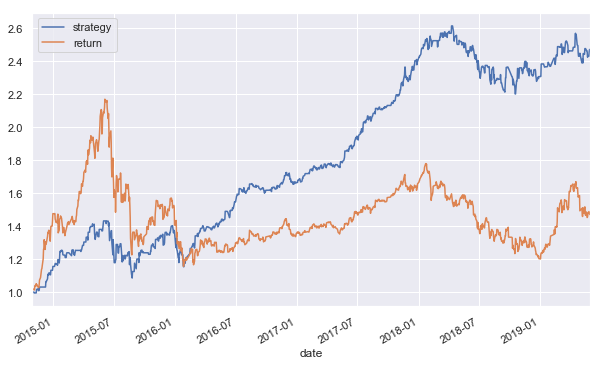

In [44]:
df2[['strategy','return']].dropna().plot(figsize=(10,6))

## 训练集数据结果

In [45]:
predict_train = clf.predict(feature_train)

In [47]:
df_train = pd.DataFrame(label_train)
df_train['predict'] = predict_train
df_train = df_train.rename(columns={'clsoe':'Next Close', 'predict':'Predict Next Close'})

In [60]:
df_train.head()

,close,Predict Next Close
date,,
2005-05-13,875.27,883.110464
2005-05-16,881.46,867.357266
2005-05-17,883.20,878.850334
2005-05-18,884.17,868.053122
2005-05-19,882.76,877.706814


In [48]:
current_close_train = hs_20d[['close']].iloc[:2300]

In [51]:
next_open_train = hs300[['open']].iloc[20:2320].shift(-1)

In [61]:
df1_train = pd.merge(df_train, current_close_train, left_index=True, right_index=True)
df2_train = pd.merge(df1_train, next_open_train, left_index=True, right_index=True)
df2_train.columns=['Next Close','Predict Next Close', 'Current Close', 'Next Open']

In [62]:
df2_train.head()

,Next Close,Predict Next Close,Current Close,Next Open
date,,,,
2005-05-13,875.27,883.110464,887.54,885.39
2005-05-16,881.46,867.357266,875.27,873.08
2005-05-17,883.20,878.850334,881.46,881.14
2005-05-18,884.17,868.053122,883.20,882.84
2005-05-19,882.76,877.706814,884.17,883.51


In [63]:
df2_train['signal'] = np.where(df2_train['Predict Next Close'] > df2_train['Next Open'] +5, 1,0)
df2_train['PL'] = np.where(df2_train['signal'] == 1, (df2_train['Next Close']-df2_train['Next Open'])/df2_train['Next Open'], 0)

In [64]:
df2_train.head()

,Next Close,Predict Next Close,Current Close,Next Open,signal,PL
date,,,,,,
2005-05-13,875.27,883.110464,887.54,885.39,0,0.0
2005-05-16,881.46,867.357266,875.27,873.08,0,0.0
2005-05-17,883.20,878.850334,881.46,881.14,0,0.0
2005-05-18,884.17,868.053122,883.20,882.84,0,0.0
2005-05-19,882.76,877.706814,884.17,883.51,0,0.0


In [65]:
df2_train['strategy'] = (df2_train['PL']+1).cumprod()
df2_train['return'] = (df2_train['Current Close'].pct_change()+1).cumprod()

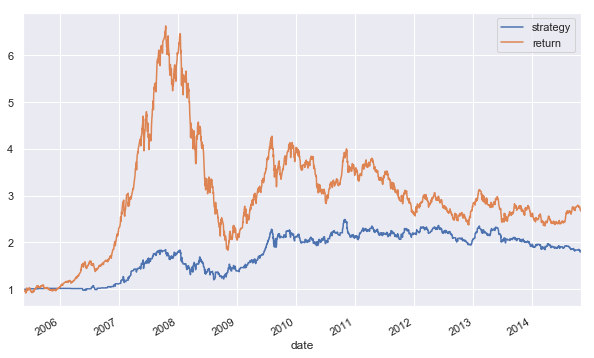

In [66]:
df2_train[['strategy','return']].dropna().plot(figsize=(10,6))